## Here, We will be seeing the outputs of the middle layer of VGG16 NN. 

In [33]:
from keras.applications import VGG16
from matplotlib import pyplot
from tensorflow.keras import Model
model = VGG16()

In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
# To find which layer is Conv layer. 
for i in range(len(model.layers)):
    if 'conv' not in model.layers[i].name: 
        continue
    filters, biases = model.layers[i].get_weights()
    print(f'layer number: {i}, {model.layers[i].name}, {filters.shape}')

layer number: 1, block1_conv1, (3, 3, 3, 64)
layer number: 2, block1_conv2, (3, 3, 64, 64)
layer number: 4, block2_conv1, (3, 3, 64, 128)
layer number: 5, block2_conv2, (3, 3, 128, 128)
layer number: 7, block3_conv1, (3, 3, 128, 256)
layer number: 8, block3_conv2, (3, 3, 256, 256)
layer number: 9, block3_conv3, (3, 3, 256, 256)
layer number: 11, block4_conv1, (3, 3, 256, 512)
layer number: 12, block4_conv2, (3, 3, 512, 512)
layer number: 13, block4_conv3, (3, 3, 512, 512)
layer number: 15, block5_conv1, (3, 3, 512, 512)
layer number: 16, block5_conv2, (3, 3, 512, 512)
layer number: 17, block5_conv3, (3, 3, 512, 512)


In [5]:
# Let's see the output of the first CNN layer (block1_conv1, (3, 3, 3, 64)). Here we have 64 layers but we will be seeing only 6 having 3 channels. 

filters, biases = model.layers[1].get_weights()

# Normalize filter values to 0-1
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

### How to Visualize Filters?

The dark squares indicate small or inhibitory weights and the light squares represent large or excitatory weights. (https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/)

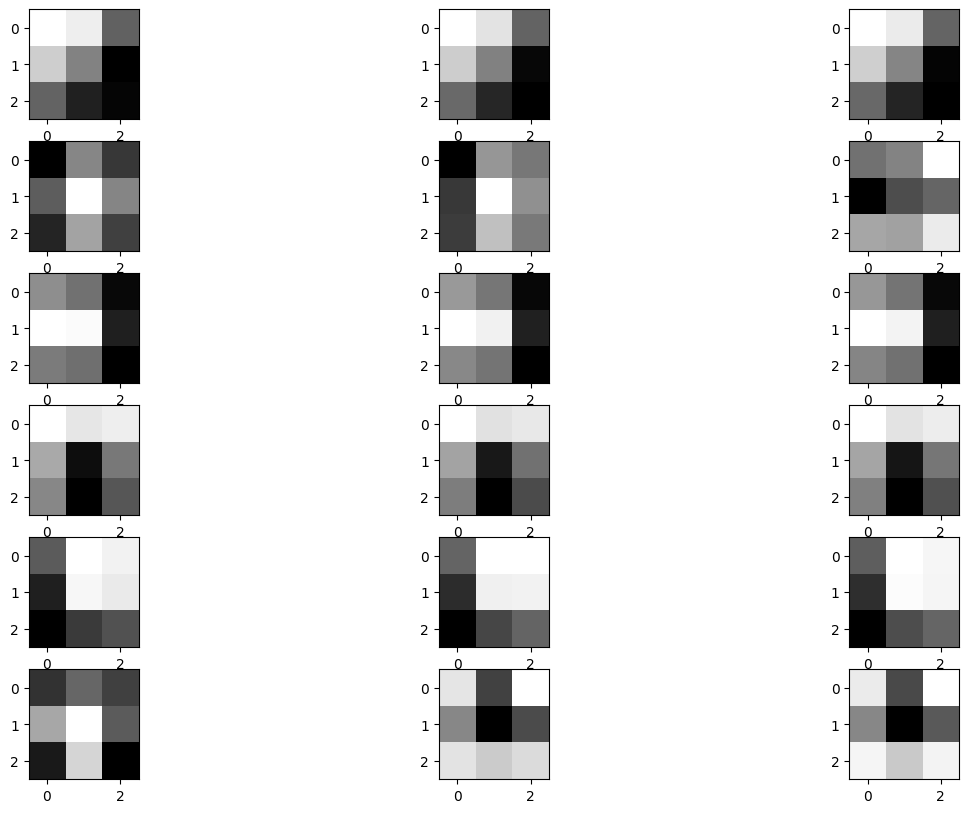

In [14]:
import matplotlib.pyplot as plt
n_filters = 6
i_ = 1
fig = plt.figure(figsize=(15, 10))
for i in range(n_filters):
    # getting filters
    f = filters[:,:,:,i]
    for j in range(3):
        # Plotting 6 filters and their 3 channels
        plt.subplot(n_filters, 3, i_)
        plt.imshow(f[:,:,j], cmap='gray')
        i_+=1
plt.show()

Although we have a visualization, we only see the first six of the 64 filters in the first convolutional layer. Visualizing all 64 filters in one image is feasible. 

Sadly, this does not scale; if we wish to start looking at filters in the second convolutional layer, we can see that again we have 64 filters, but each has 64 channels to match the input feature maps. To see all 64 channels in a row for all 64 filters would require (64×64) 4,096 subplots in which it may be challenging to see any detail.

## How to Visualize Feature Maps?

The activation maps, called feature maps, capture the result of applying the filters to input, such as the input image or another feature map. The expectation would be that the feature maps close to the input detect small or fine-grained detail, whereas feature maps close to the output of the model capture more general features.

In [34]:
# Here we are seeing what feature are collected by the first layer of VGG16. 
model = Model(inputs=model.inputs, outputs=model.layers[1].output)

In [38]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
from keras.applications.vgg16 import preprocess_input, decode_predictions

image = load_img('dog.jpeg', target_size=(224, 224))
# convert image into numpy array
img = img_to_array(image)
# expand the dimension so that it represents a single 'sample'
img = np.expand_dims(img, axis = 0)
# Prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)

1/1 [==============================] - 0s 11ms/step


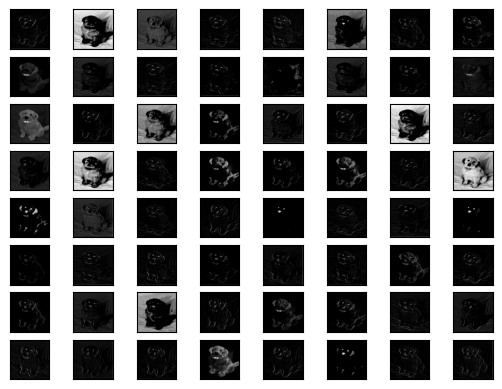

In [42]:
# Get feature map for the first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8*8 squares
square = 8 
i_ = 1
for _ in range(square):
    for _ in range(square):
        ax = plt.subplot(square, square, i_)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps[0,:,:,i_ - 1], cmap='gray')
        i_ += 1
plt.show()

1/1 [==============================] - 0s 229ms/step


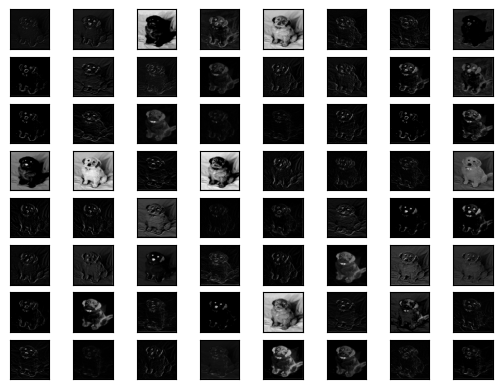

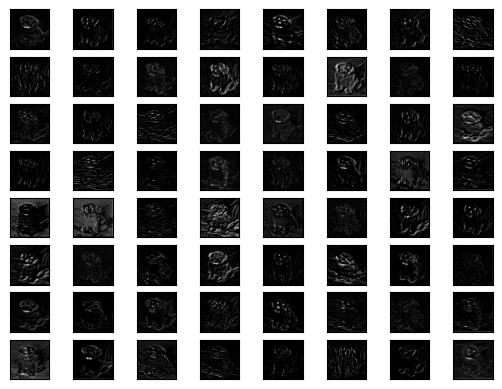

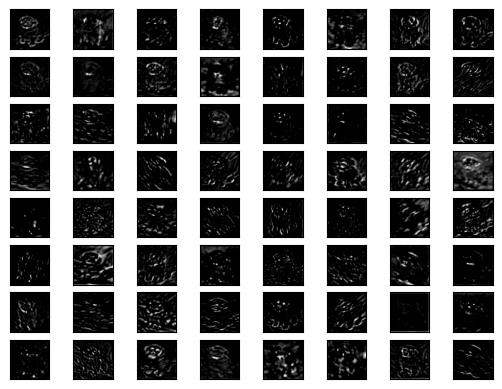

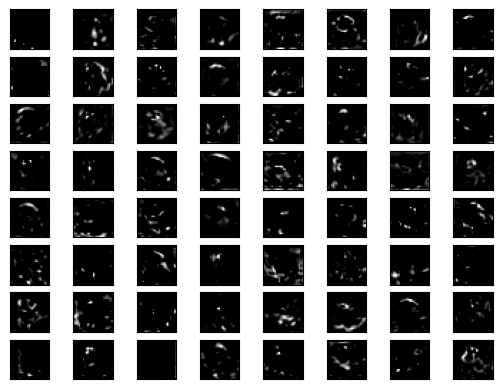

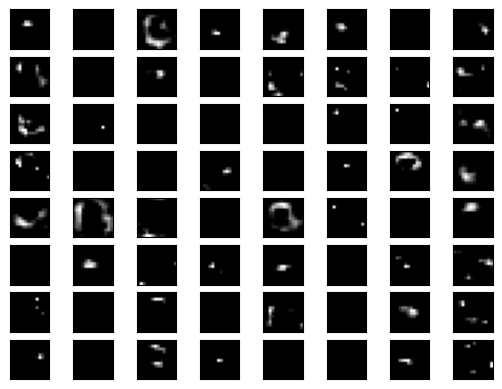

In [50]:
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('dog.jpeg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
 # plot all 64 maps in an 8x8 squares
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
            ix += 1
    # show the figure
    pyplot.show()

We can see that the feature maps closer to the input of the model capture a lot of fine detail in the image and that as we progress deeper into the model, the feature maps show less and less detail.

This pattern was to be expected, as the model abstracts the features from the image into more general concepts that can be used to make a classification. Although it is not clear from the final image that the model saw a dog, we generally lose the ability to interpret these deeper feature maps.